## **Import all packages**

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

# For normalization
from sklearn.preprocessing import StandardScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# For splitting function 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Naive Bayes Machine learning library
from sklearn.naive_bayes import GaussianNB

# Import the metrics
from sklearn import metrics

# Import the classification_report from metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score


## **Reading** **dataset**

In [2]:
nba_rookies_data = pd.read_csv('nba_logreg.csv')

## **Data Visualization and Exploration**

Print 2 rows

In [3]:
nba_rookies_data.head(2)

Name    GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram   NaN  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35.0  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  

[2 rows x 21 columns]

In [4]:
nba_rookies_data.tail(2)

Name    GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  \
1338  Litterial Green  52.0  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0   
1339        Jon Barry  47.0  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3   

      ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
1338  ...  1.8  62.5   0.2   0.4  0.7  2.2  0.4  0.1  0.8            1  
1339  ...  1.0  67.3   0.2   0.7  0.9  1.4  0.7  0.1  0.9            1  

[2 rows x 21 columns]

In [5]:
nba_rookies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1331 non-null   float64
 2   MIN          1336 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1336 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1337 non-null   float64
 17  STL          1337 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [6]:
nba_rookies_data.shape

(1340, 21)

In [7]:
nba_rookies_data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [8]:
nba_rookies_data.describe().T

count       mean        std   min   25%    50%     75%    max
GP           1331.0  60.417731  17.428301  11.0  47.0  63.00  77.000   82.0
MIN          1336.0  17.612126   8.307959   3.1  10.8  16.10  22.825   40.9
PTS          1340.0   6.801493   4.357545   0.7   3.7   5.55   8.800   28.2
FGM          1340.0   2.629104   1.683555   0.3   1.4   2.10   3.400   10.2
FGA          1340.0   5.885299   3.593488   0.8   3.3   4.80   7.500   19.8
FG%          1340.0  44.169403   6.137679  23.8  40.2  44.10  47.900   73.7
3P Made      1340.0   0.247612   0.383688   0.0   0.0   0.10   0.400    2.3
3PA          1340.0   0.779179   1.061847   0.0   0.0   0.30   1.200    6.5
3P%          1329.0  19.308126  16.022916   0.0   0.0  22.40  32.500  100.0
FTM          1340.0   1.297687   0.987246   0.0   0.6   1.00   1.600    7.7
FTA          1340.0   1.821940   1.322984   0.0   0.9   1.50   2.300   10.2
FT%          1328.0  70.252334  10.592506   0.0  64.6  71.20  77.600  100.0
OREB         1336.0   1.009880   0.777940   0.0   0.4   0.80   1.400    5.3
DREB         1340.0   2.025746   1.360008   0.2   1.0   1.70   2.600    9.6
REB          1340.0   3.034478   2.057774   0.3   1.5   2.50   4.000   13.9
AST          1337.0   1.553179   1.471742   0.0   0.6   1.10   2.000   10.6
STL          1337.0   0.618399   0.410042   0.0   0.3   0.50   0.800    2.5
BLK          1340.0   0.368582   0.429049   0.0   0.1   0.20   0.500    3.9
TOV          1340.0   1.193582   0.722541   0.1   0.7   1.00   1.500    4.4
TARGET_5Yrs  1340.0   0.620149   0.485531   0.0   0.0   1.00   1.000    1.0

In [9]:
nba_rookies_data["TARGET_5Yrs"].value_counts()

1    831
0    509
Name: TARGET_5Yrs, dtype: int64

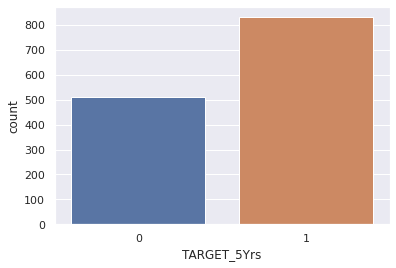

In [10]:
# countplot (shows the count of the TARGET_5Yrs)
sns.countplot(x="TARGET_5Yrs", data=nba_rookies_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4384fb02d0>,
      dtype=object)

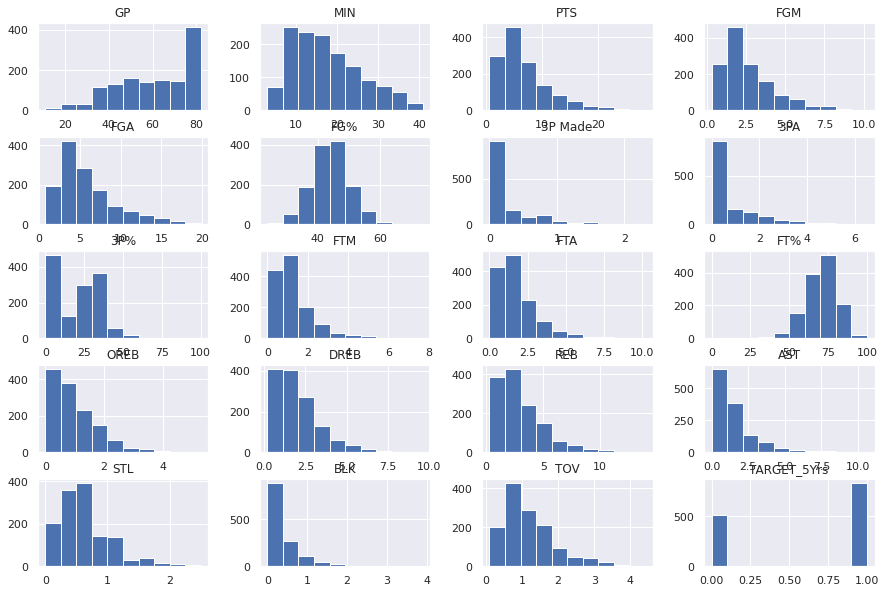

In [11]:
# Histogram
nba_rookies_data.hist(figsize=(15,10))

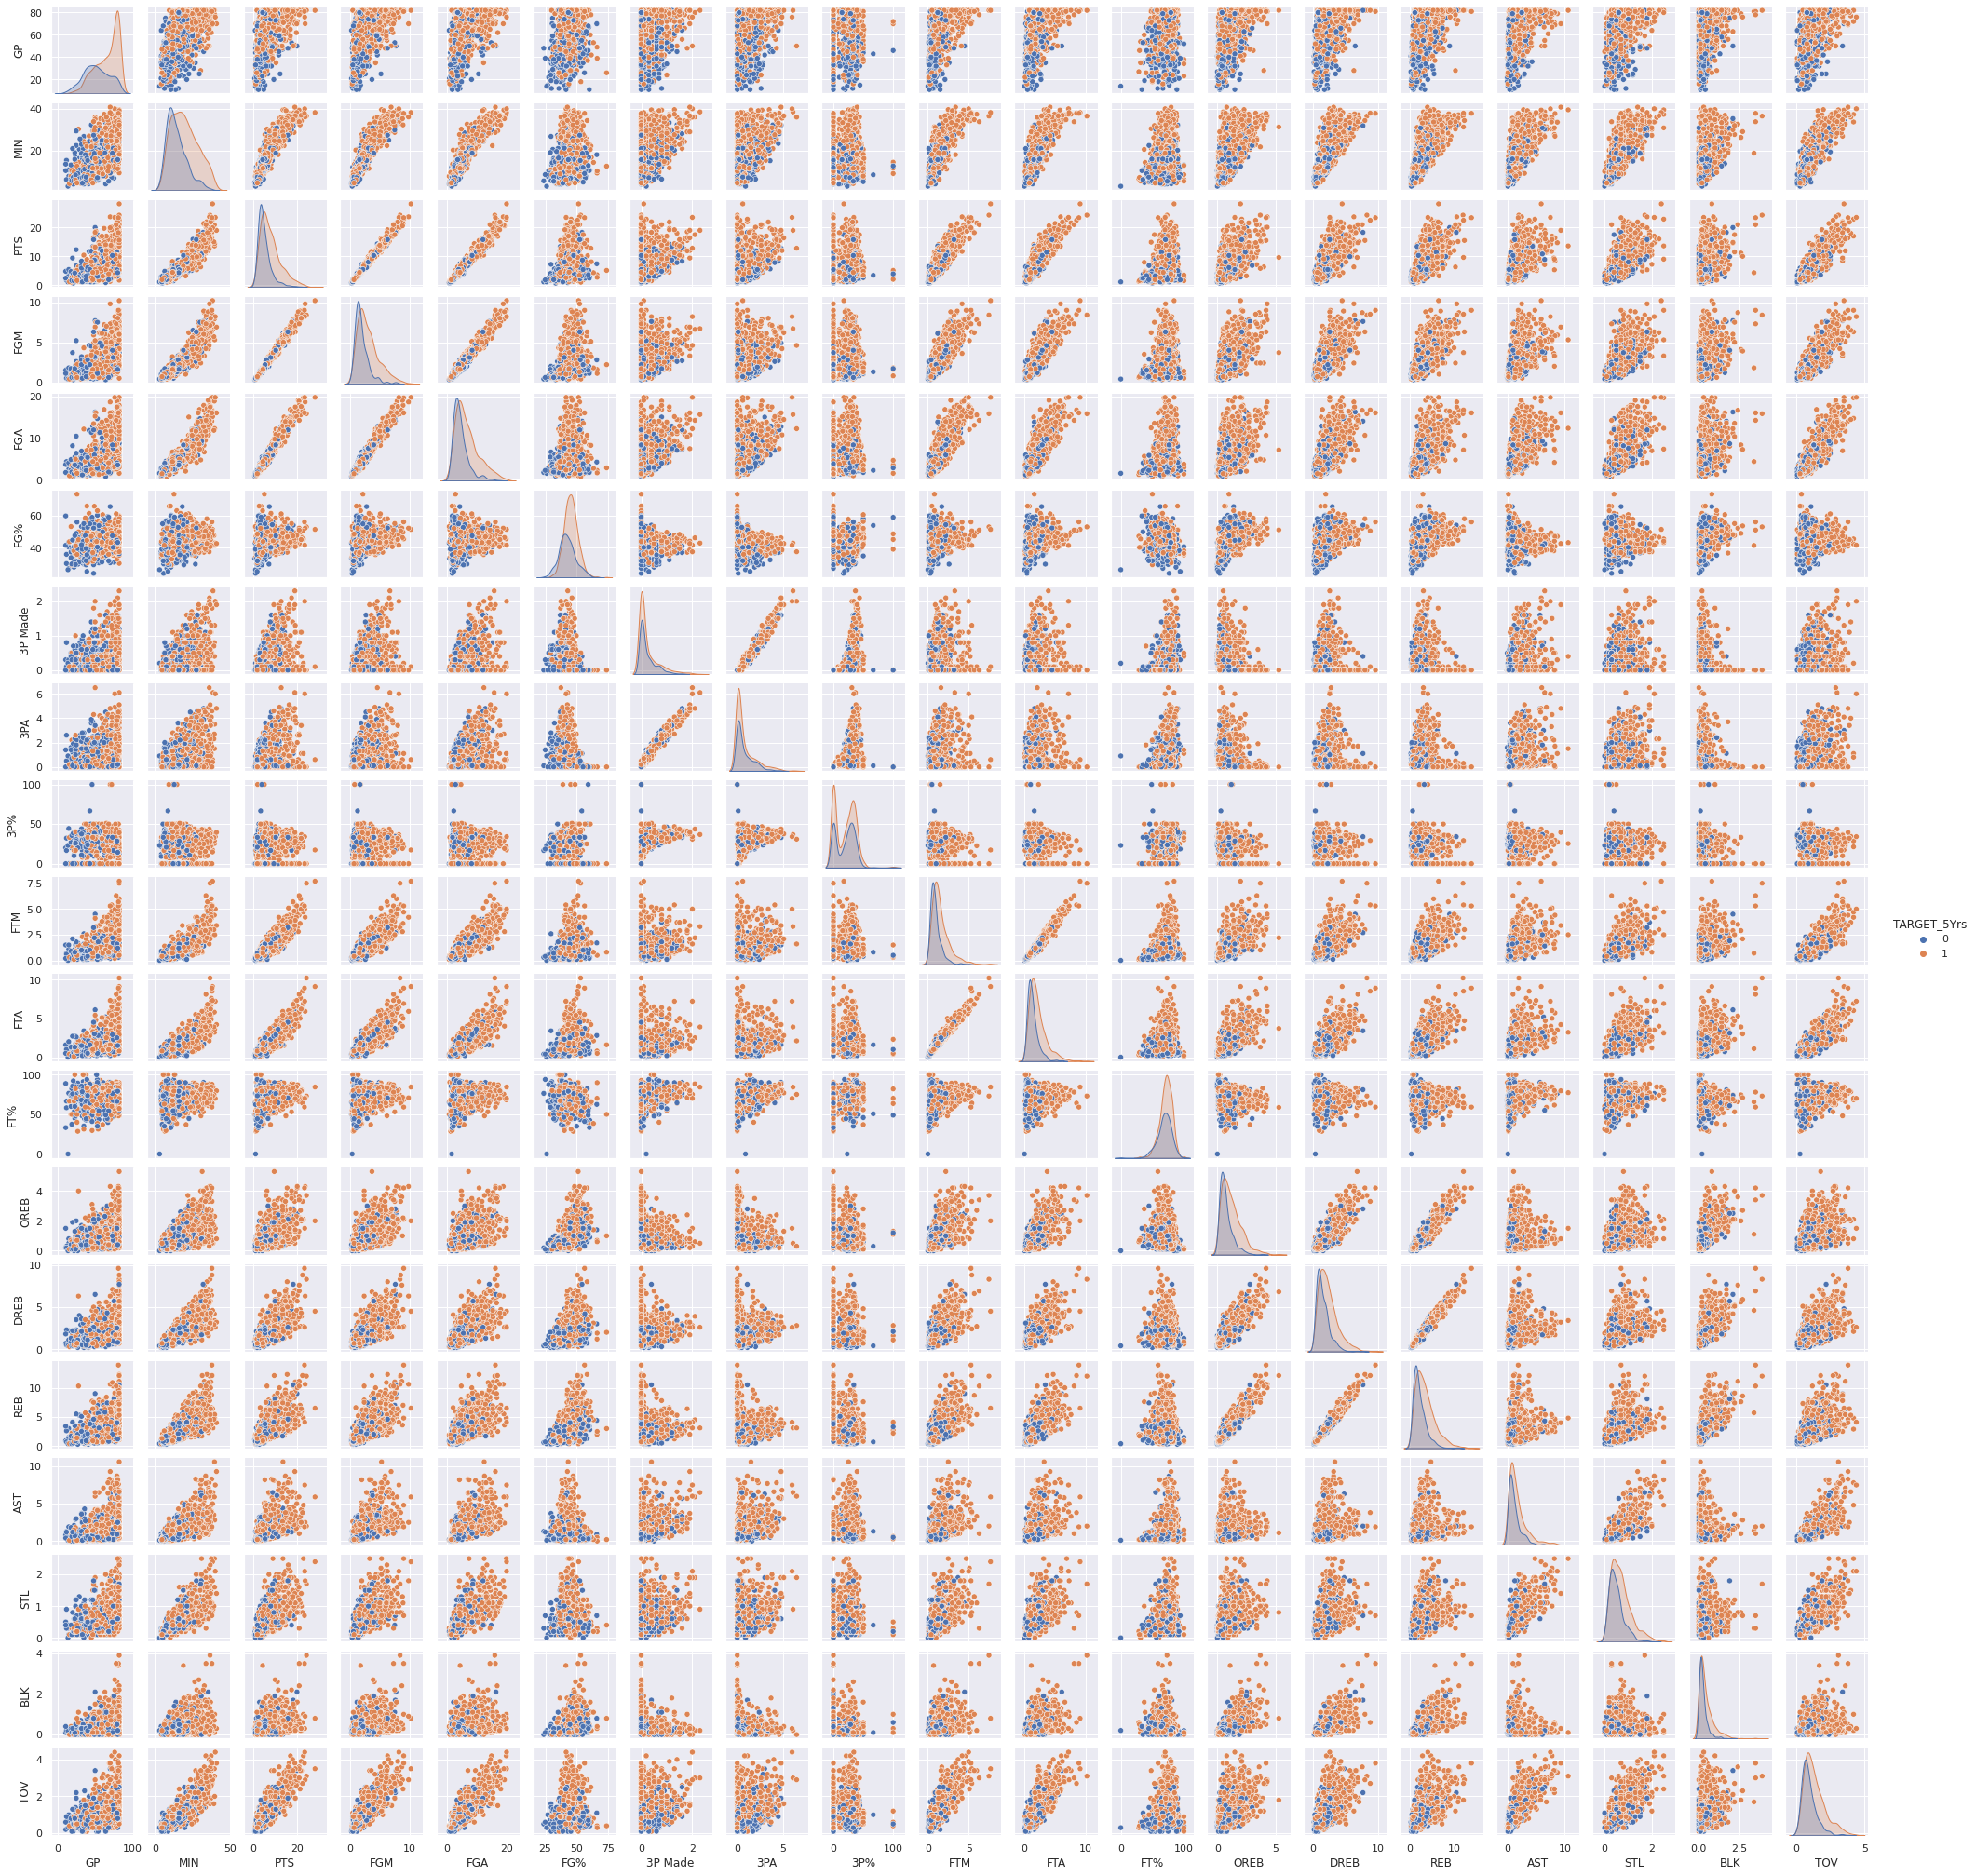

In [12]:
# Pairplot
sns.pairplot(nba_rookies_data, hue="TARGET_5Yrs", height=1.5)

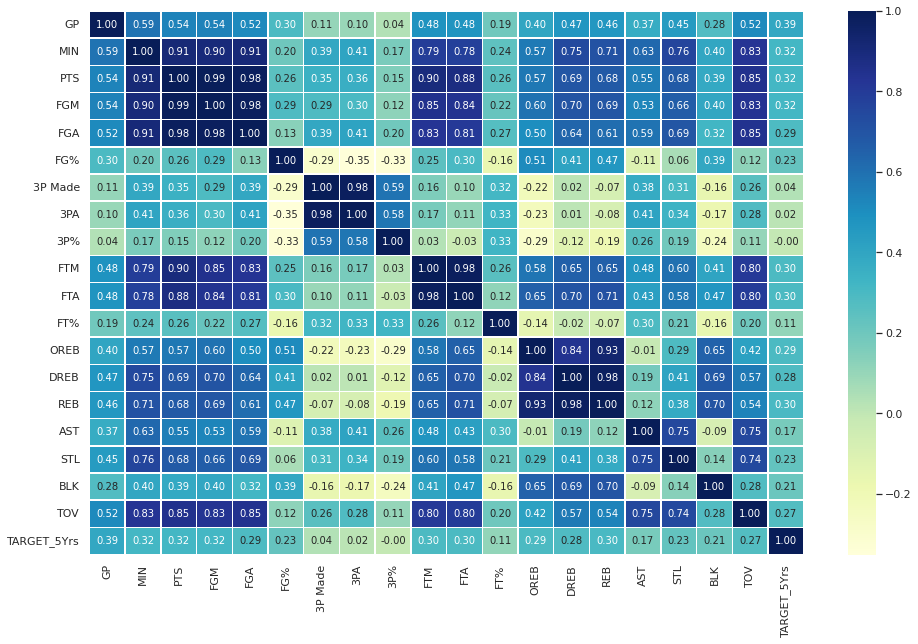

In [13]:
#Correlaton matrix
corr_matrix = nba_rookies_data.corr()
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

## **Data Pre-processing and cleaning**

In [14]:
# Check the missing values in the dataset

nba_rookies_data.isnull().values.any()

True

It shows there are no null values but 0 is not considered in Null here but we know that 0 can also be the missing value, so we replace 0 by Nan

In [15]:
nba_rookies_data.isnull().sum()

Name            0
GP              9
MIN             4
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%            12
OREB            4
DREB            0
REB             0
AST             3
STL             3
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

Now replacing the NaN to median

In [16]:
nba_rookies_data['GP'].fillna(nba_rookies_data['GP'].median(),inplace=True)
nba_rookies_data['MIN'].fillna(nba_rookies_data['MIN'].median(),inplace=True)
nba_rookies_data['3P Made'].fillna(nba_rookies_data['3P Made'].median(),inplace=True)
nba_rookies_data['3PA'].fillna(nba_rookies_data['3PA'].median(),inplace=True)
nba_rookies_data['3P%'].fillna(nba_rookies_data['3P%'].median(),inplace=True)
nba_rookies_data['FTM'].fillna(nba_rookies_data['FTM'].median(),inplace=True)
nba_rookies_data['FTA'].fillna(nba_rookies_data['FTA'].median(),inplace=True)
nba_rookies_data['FT%'].fillna(nba_rookies_data['FT%'].median(),inplace=True)
nba_rookies_data['OREB'].fillna(nba_rookies_data['OREB'].median(),inplace=True)
nba_rookies_data['AST'].fillna(nba_rookies_data['AST'].median(),inplace=True)
nba_rookies_data['STL'].fillna(nba_rookies_data['STL'].median(),inplace=True)
nba_rookies_data['BLK'].fillna(nba_rookies_data['BLK'].median(),inplace=True)
nba_rookies_data['TARGET_5Yrs'].fillna(nba_rookies_data['TARGET_5Yrs'].median(),inplace=True)

nba_rookies_data.head()

Name    GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  63.0  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35.0  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74.0  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58.0  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48.0  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0            0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0            1  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8            1  

[5 rows x 21 columns]

## **Model Building**

In [18]:
nba_rookies_data

Name    GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  \
0      Brandon Ingram  63.0  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0   
1     Andrew Harrison  35.0  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5   
2      JaKarr Sampson  74.0  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4   
3         Malik Sealy  58.0  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6   
4         Matt Geiger  48.0  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0   
...               ...   ...   ...  ...  ...  ...   ...      ...  ...   ...   
1335      Chris Smith  80.0  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3   
1336      Brent Price  68.0  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7   
1337     Marlon Maxey  43.0  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0   
1338  Litterial Green  52.0  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0   
1339        Jon Barry  47.0  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3   

      ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0     ...  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1     ...  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  
2     ...  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0            0  
3     ...  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0            1  
4     ...  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8            1  
...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...          ...  
1335  ...  1.5  79.2   0.4   0.8  1.2  2.5  0.6  0.2  0.8            0  
1336  ...  1.0  79.4   0.4   1.1  1.5  2.3  0.8  0.0  1.3            1  
1337  ...  1.6  64.3   1.5   2.3  3.8  0.3  0.3  0.4  0.9            0  
1338  ...  1.8  62.5   0.2   0.4  0.7  2.2  0.4  0.1  0.8            1  
1339  ...  1.0  67.3   0.2   0.7  0.9  1.4  0.7  0.1  0.9            1  

[1340 rows x 21 columns]

In [19]:
#Cleaning the 3P% column
nba_rookies_data["3P%"] = nba_rookies_data["3P%"].map(lambda x:0 if x=="-" else x)

In [20]:
#Deleting the name column
nba_rookies_data = nba_rookies_data.drop(["Name"], axis=1)
nba_rookies_data

GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
0     63.0  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   
1     35.0  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   
2     74.0  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   
3     58.0  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   
4     48.0  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   
...    ...   ...  ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   
1335  80.0  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  1.2  1.5  79.2   
1336  68.0  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  0.8  1.0  79.4   
1337  43.0  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  1.0  1.6  64.3   
1338  52.0  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  1.2  1.8  62.5   
1339  47.0  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  0.7  1.0  67.3   

      OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0      0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1      0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  
2      0.5   1.7  2.2  1.0  0.5  0.3  1.0            0  
3      1.0   0.9  1.9  0.8  0.6  0.1  1.0            1  
4      1.0   1.5  2.5  0.3  0.3  0.4  0.8            1  
...    ...   ...  ...  ...  ...  ...  ...          ...  
1335   0.4   0.8  1.2  2.5  0.6  0.2  0.8            0  
1336   0.4   1.1  1.5  2.3  0.8  0.0  1.3            1  
1337   1.5   2.3  3.8  0.3  0.3  0.4  0.9            0  
1338   0.2   0.4  0.7  2.2  0.4  0.1  0.8            1  
1339   0.2   0.7  0.9  1.4  0.7  0.1  0.9            1  

[1340 rows x 20 columns]

In [21]:
#Creating Matrix of Features
X = nba_rookies_data.drop(["TARGET_5Yrs"], axis = 1)

In [22]:
#creating target column
y = nba_rookies_data.loc[:, "TARGET_5Yrs"]

In [23]:
nba_rookies_data.dtypes

GP             float64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs      int64
dtype: object

Split the dataset into training and test sets

In [24]:
# Splitting into training set and test set in 80:20 ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(1072, 19) (1072,)
(268, 19) (268,)


In [25]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train1, y_train1)
lr.score(X_test1, y_test1)


0.7089552238805971

In [26]:
# SVM
svm = SVC(gamma='auto')
svm.fit(X_train1, y_train1)
svm.score(X_test1, y_test1)

0.585820895522388

In [27]:
# Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train1, y_train1)
rf.score(X_test1, y_test1)

0.7014925373134329

In [28]:
# Create hyperparameter options
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

# Apply grid search
log_clf = GridSearchCV(LogisticRegression(), grid, cv=5, verbose=0)

#Fit
log_clf.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [29]:
#print the best estimator
log_clf.best_estimator_

LogisticRegression(C=0.1)

In [35]:
X_test1

GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
574   37.0   7.8   3.9  1.5   3.4  46.0      0.1  0.3  27.3  0.7  1.1  65.0   
661   26.0  12.2   2.8  1.1   2.8  38.9      0.6  1.5  37.5  0.1  0.2  50.0   
458   81.0  18.9   4.3  1.8   4.4  41.4      0.0  0.0   0.0  0.7  1.1  65.6   
1023  41.0   5.8   2.8  1.2   2.6  44.9      0.0  0.0   0.0  0.4  0.7  66.7   
958   75.0  26.1   9.5  3.6   9.1  39.9      0.9  2.7  32.2  1.4  2.1  64.0   
...    ...   ...   ...  ...   ...   ...      ...  ...   ...  ...  ...   ...   
1111  46.0  12.1   4.5  1.8   4.3  40.5      0.0  0.3  16.7  1.0  1.3  76.3   
1074  67.0  16.6   7.0  3.2   5.8  54.9      0.0  0.1   0.0  0.7  1.0  73.4   
744   82.0  30.5  13.0  5.5  10.3  53.1      0.0  0.0   0.0  2.1  2.6  79.3   
731   44.0   9.2   3.0  1.0   3.0  35.4      0.3  1.0  35.7  0.6  0.9  71.1   
317   81.0  28.1  14.7  6.4  12.4  51.5      0.0  0.0   0.0  2.0  2.9  68.4   

      OREB  DREB  REB  AST  STL  BLK  TOV  
574    0.6   0.8  1.4  0.2  0.2  0.0  0.4  
661    0.3   0.8  1.0  1.0  0.4  0.3  0.6  
458    1.1   4.6  5.7  1.4  0.3  3.4  1.7  
1023   0.8   0.9  1.7  0.3  0.2  0.1  0.4  
958    0.4   2.2  2.6  4.7  1.1  0.2  2.3  
...    ...   ...  ...  ...  ...  ...  ...  
1111   0.9   1.0  1.8  1.3  0.7  0.1  1.2  
1074   0.8   1.9  2.7  0.5  0.7  0.4  0.6  
744    2.7   5.4  8.1  1.0  0.5  1.8  1.8  
731    0.3   0.7  1.0  0.4  0.2  0.2  0.4  
317    2.4   4.9  7.2  1.0  0.4  0.5  2.3  

[268 rows x 19 columns]

In [49]:
#lr.predict(np.array([35,26.9,7.2,2,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2,2.4,3.7,1.1,0.5,1.6]).reshape(1,19))
lr.predict(np.array([58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1,0.9,1.9,0.8,0.6,0.1,1]).reshape(1,19))
# lr.predict(np.array([X_test1, y_test1]).reshape(1,19))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [30]:
#evaluating the performance of the best estimator
log_clf1 = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_clf1.fit(X_train1, y_train1)
y_pred = log_clf1.predict(X_test1)
accuracy_score(y_pred, y_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6940298507462687

In [31]:
# Splitting into training set and test set in 90:10 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(1206, 19) (1206,)
(134, 19) (134,)


In [32]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train2, y_train2)
lr.score(X_test2, y_test2)

0.7014925373134329

In [33]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [34]:
def get_score(model, X_train1, X_test1, y_train1, y_test1):
    model.fit(X_train1, y_train1)
    return model.score(X_test1, y_test1)

## **Performance Evaluation**

In [ ]:
#Function that creates visualization for confusion matrix
sns.set(font_scale=1.0)

def plot_conf_mat(y_test1, y_preds):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test1, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

In [ ]:
#function that calculates classification metrics using cross validation
cv_metrics = ["accuracy", "precision", "recall", "f1"]
def cv_calculator(cv_metrics, clf, X, y):
    cv_dict = {}
    for metric in cv_metrics:
        cv_dict[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))
    return cv_dict

In [ ]:
#Plot ROC Curve and calculate AUC for Logistic Regression
plot_roc_curve(log_clf1, X_test1, y_test1)

In [ ]:
#confusion matrix for Log Reg
y_pred2 = log_clf1.predict(X_test1)
plot_conf_mat(y_pred2, y_test1)

In [ ]:
#cross validated classification metrics for Log Reg
cv_dict2 = cv_calculator(cv_metrics, log_clf, X, y)
cv_dict2

In [ ]:
#visualize the cv metrics
cv_metrics2 = pd.DataFrame(cv_dict2, index=["score"])
cv_metrics2.T.plot.bar(title="Log Reg CV Metrics", legend=False)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train1)
X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)
X_train

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train1, y_train1.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test1, predictions))

In [ ]:
%%shell
jupyter nbconvert --to html /content/Group10_NBA_Rookies(2).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html /content/Group10_NBA_Rookies (2).ipynb'


CalledProcessError: ignored

In [ ]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))